# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [2]:
import numpy as np


## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [3]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

x = np.asmatrix(np.c_[np.ones((15,1)), x])

I = np.identity(2)
alphas = [0.01, 0.1, 1.0]  # Zmiana α na listę
weights = []
mse_values = []

for alpha in alphas:
    w = np.linalg.inv(x.T * x + alpha * I) * x.T * y
    w = w.ravel()
    weights.append(w)
    y_pred = x * np.matrix(w).T
    mse = np.mean(np.square(y - y_pred))
    mse_values.append(mse)
    print(f"Alpha: {alpha}, Weights: {w}, MSE: {mse:.4f}")

Alpha: 0.01, Weights: [[-167.85534019    1.54416013]], MSE: 373.7938
Alpha: 0.1, Weights: [[-101.72397081    1.16978757]], MSE: 426.0451
Alpha: 1.0, Weights: [[-20.59044706   0.71048616]], MSE: 592.4636


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [4]:
def sgd(X, y, alpha=0.1, learning_rate=0.0001, epochs=10):
    np.random.seed(42)
    w = np.zeros((X.shape[1], 1))
    n_samples = X.shape[0]
    
    X = np.asarray(X)
    y = np.asarray(y)
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(n_samples):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            
            y_pred = np.dot(xi, w)
            grad_mse = -2 * xi.T.dot(yi - y_pred) / n_samples
            grad_l1 = alpha * np.sign(w)  # Regularyzacja L1
            w = w - learning_rate * (grad_mse + grad_l1)
    
    return w

# Testowanie
w_sgd = sgd(x, y, alpha=0.1, learning_rate=0.0000001, epochs=10)
print("Wagi z SGD (Lasso):", w_sgd.ravel())

Wagi z SGD (Lasso): [0.00019717 0.0356383 ]


In [5]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w=w.ravel()


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

y_pred:  [-0.39350442  0.00745742 -0.19696971 -0.02869256 -0.47369679 -0.58214672
 -0.31331205 -0.26926966  0.08764979 -0.02869256 -0.50984676 -0.22522727
  0.00745742 -0.12466975 -0.88255103 -1.07119334 -0.75831628 -0.39350442
 -0.50195435 -0.59003913 -0.18118488 -0.50984676 -0.64986634 -0.10099252
 -0.0931001   0.0955422  -0.22522727 -0.34946203 -0.31331205 -0.06484254
  0.01534983 -0.26926966 -0.83061623 -0.95485099 -0.02869256 -0.24101209
 -0.43754681 -0.47369679 -0.03658497 -0.26926966 -0.43754681  0.5247616
 -0.19696971 -0.30541964 -0.41386957  0.00745742 -0.54599674 -0.15292732
 -0.50984676 -0.23311968  1.30047153  1.21238675  1.46874867  1.71390611
  1.57719861  1.53315622  1.22027916  1.32541702  1.49700624  1.34909425
  1.73427127  1.24064432  1.79409848  1.54104863  1.05658235  1.24853673
  1.37277149  1.43717903  2.01431043  1.50947899  1.34451392  1.31294427
  1.94990288  1.621241    1.36487907  1.3287291   1.66528339  1.59298343
  1.45296385  1.25311706  1.54562897  1.501

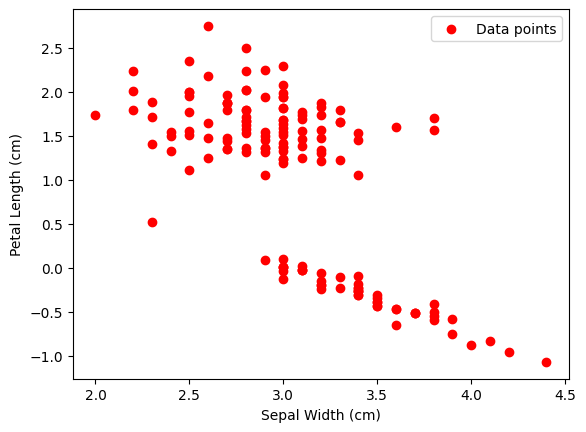

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

iris_df['target'] = iris_data.target
# Select two features: 'sepal width (cm)' and 'petal length (cm)'
x = iris_df[['sepal width (cm)', 'petal length (cm)']].values
y = iris_df['target'].values

# Calculate dataset size
dataset_size = np.size(y)

# Compute means of x and y
mean_x = np.mean(x, axis=0)
mean_y = np.mean(y)

# Calculate sum of squares
SS_xy = np.sum(y[:, np.newaxis] * x, axis=0) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x**2, axis=0) - dataset_size * mean_x**2

# Compute slope and intercept for each feature
a = SS_xy / SS_xx
b = mean_y - np.dot(a, mean_x)

# Predict y values
y_pred = np.dot(x, a) + b

# Print predicted values
print("y_pred: ", y_pred)

# Plot the data points
plt.scatter(x[:, 0], y_pred, color='red', label="Data points")
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()